In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten 
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [4]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [5]:
x_train=train_datagen.flow_from_directory(r"C:\Users\vijay\OneDrive\Desktop\IBM-Project-24376-1659942131\Data Collection\Dataset Plant Disease\fruit-dataset\fruit-dataset\train",target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 5384 images belonging to 6 classes.


In [9]:
x_test=test_datagen.flow_from_directory(r"C:\Users\vijay\OneDrive\Desktop\IBM-Project-24376-1659942131\Data Collection\Dataset Plant Disease\fruit-dataset\fruit-dataset\test",target_size=(128,128),class_mode='categorical',batch_size=24)

Found 1686 images belonging to 6 classes.


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [11]:
model=Sequential()

In [12]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))

In [13]:
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [14]:
32*(3*3*3+1)
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [15]:
model.add(Dense(6,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
len(x_train)

225

In [16]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

Epoch 1/10
225/225 [==============================] - 391s 2s/step - loss: 0.9299 - accuracy: 0.7819 - val_loss: 0.2378 - val_accuracy: 0.9199
Epoch 2/10
225/225 [==============================] - 100s 446ms/step - loss: 0.2601 - accuracy: 0.9077 - val_loss: 0.1868 - val_accuracy: 0.9306
Epoch 3/10
225/225 [==============================] - 95s 420ms/step - loss: 0.1937 - accuracy: 0.9341 - val_loss: 0.1951 - val_accuracy: 0.9318
Epoch 4/10
225/225 [==============================] - 92s 407ms/step - loss: 0.1517 - accuracy: 0.9495 - val_loss: 0.2110 - val_accuracy: 0.9270
Epoch 5/10
225/225 [==============================] - 97s 432ms/step - loss: 0.1455 - accuracy: 0.9493 - val_loss: 0.1722 - val_accuracy: 0.9448
Epoch 6/10
225/225 [==============================] - 99s 442ms/step - loss: 0.1264 - accuracy: 0.9571 - val_loss: 0.0783 - val_accuracy: 0.9757
Epoch 7/10
225/225 [==============================] - 97s 431ms/step - loss: 0.0971 - accuracy: 0.9664 - val_loss: 0.1165 - val_acc

In [17]:
model.save('fruit.h5')

In [18]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [19]:
model=load_model('fruit.h5')

In [20]:
img=image.load_img(r"C:\Users\vijay\OneDrive\Desktop\IBM-Project-24376-1659942131\Data Collection\Dataset Plant Disease\fruit-dataset\fruit-dataset\test\Corn_(maize)___healthy\0a72d779-4df2-4365-9251-1733a1a1085c___R.S_HL 7992 copy 2.jpg")


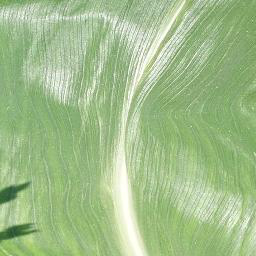

In [21]:
img

In [22]:
img=image.load_img(r"C:\Users\vijay\OneDrive\Desktop\IBM-Project-24376-1659942131\Data Collection\Dataset Plant Disease\fruit-dataset\fruit-dataset\test\Peach___Bacterial_spot\0a05b466-12ed-4ef3-935c-ea7e73107705___Rut._Bact.S 3353.JPG",target_size=(128,128))


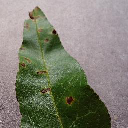

In [23]:
img

In [24]:

x=image.img_to_array(img)

In [25]:
x

array([[[197., 185., 187.],
        [202., 190., 192.],
        [206., 194., 196.],
        ...,
        [176., 169., 176.],
        [168., 161., 168.],
        [174., 167., 174.]],

       [[196., 184., 186.],
        [195., 183., 185.],
        [200., 188., 190.],
        ...,
        [171., 164., 171.],
        [168., 161., 168.],
        [172., 165., 172.]],

       [[192., 180., 182.],
        [192., 180., 182.],
        [199., 187., 189.],
        ...,
        [168., 161., 168.],
        [168., 161., 168.],
        [169., 162., 169.]],

       ...,

       [[163., 147., 150.],
        [148., 132., 135.],
        [167., 151., 154.],
        ...,
        [110.,  97., 104.],
        [129., 116., 123.],
        [135., 122., 129.]],

       [[169., 153., 156.],
        [127., 111., 114.],
        [ 86.,  70.,  73.],
        ...,
        [104.,  91.,  98.],
        [121., 108., 115.],
        [110.,  97., 104.]],

       [[145., 129., 132.],
        [156., 140., 143.],
        [111.,  

In [26]:
x=np.expand_dims(x,axis=0)

In [27]:
x

array([[[[197., 185., 187.],
         [202., 190., 192.],
         [206., 194., 196.],
         ...,
         [176., 169., 176.],
         [168., 161., 168.],
         [174., 167., 174.]],

        [[196., 184., 186.],
         [195., 183., 185.],
         [200., 188., 190.],
         ...,
         [171., 164., 171.],
         [168., 161., 168.],
         [172., 165., 172.]],

        [[192., 180., 182.],
         [192., 180., 182.],
         [199., 187., 189.],
         ...,
         [168., 161., 168.],
         [168., 161., 168.],
         [169., 162., 169.]],

        ...,

        [[163., 147., 150.],
         [148., 132., 135.],
         [167., 151., 154.],
         ...,
         [110.,  97., 104.],
         [129., 116., 123.],
         [135., 122., 129.]],

        [[169., 153., 156.],
         [127., 111., 114.],
         [ 86.,  70.,  73.],
         ...,
         [104.,  91.,  98.],
         [121., 108., 115.],
         [110.,  97., 104.]],

        [[145., 129., 132.],
       

In [28]:
y=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 1s 500ms/step


In [29]:
x_train.class_indices

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

In [30]:
index=['Apple___Black_rot','Apple___healthy','Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy','Peach___Bacterial_spot','Peach___healthy']


In [37]:
index[y[0]]

'Apple___healthy'

In [38]:
img=image.load_img(r"C:\Users\vijay\OneDrive\Desktop\IBM-Project-24376-1659942131\Data Collection\Dataset Plant Disease\fruit-dataset\fruit-dataset\test\Corn_(maize)___healthy\0cff7eca-bb9e-4cc3-ad7a-23694bdba903___R.S_HL 8289 copy 2.jpg",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['Apple___Black_rot','Apple___healthy','Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy','Peach___Bacterial_spot','Peach___healthy']
index[y[0]]

1/1 [==============================] - 0s 62ms/step


'Corn_(maize)___healthy'